In [2]:
import seaborn as sns
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("plotdata_ClosureFuzzer_mutator_prng_choice_success.csv").set_index("Unnamed: 0")
df = df.drop(df[df["Fuzz Target"] == "ClosureFuzzer2"])
# dfx = pd.read_csv("plot_MazeFuzzer2.csv").set_index("Unnamed: 0")
# df = pd.concat([df, dfx])
df2 = pd.pivot_table(df,index="Step", columns=["Seed","Param","Fuzz Target"],values="Coverage")
idx =pd.Index( np.logspace(np.log10(2),np.log10(df2.index.max()),2000).round(), dtype=int, name="Step").drop_duplicates(keep="first")
fullidx = df.index.union(idx).drop_duplicates(keep="first")
df2 = df2.reindex(fullidx).fillna(method="ffill").reindex(idx).reset_index()
df2 = df2.melt(id_vars="Step", var_name=["Seed","Param", "Fuzz Target"], value_name="Coverage")
df2

KeyError: "['Seed', 'Step', 'Coverage', 'Param', 'Fuzz Target'] not found in axis"

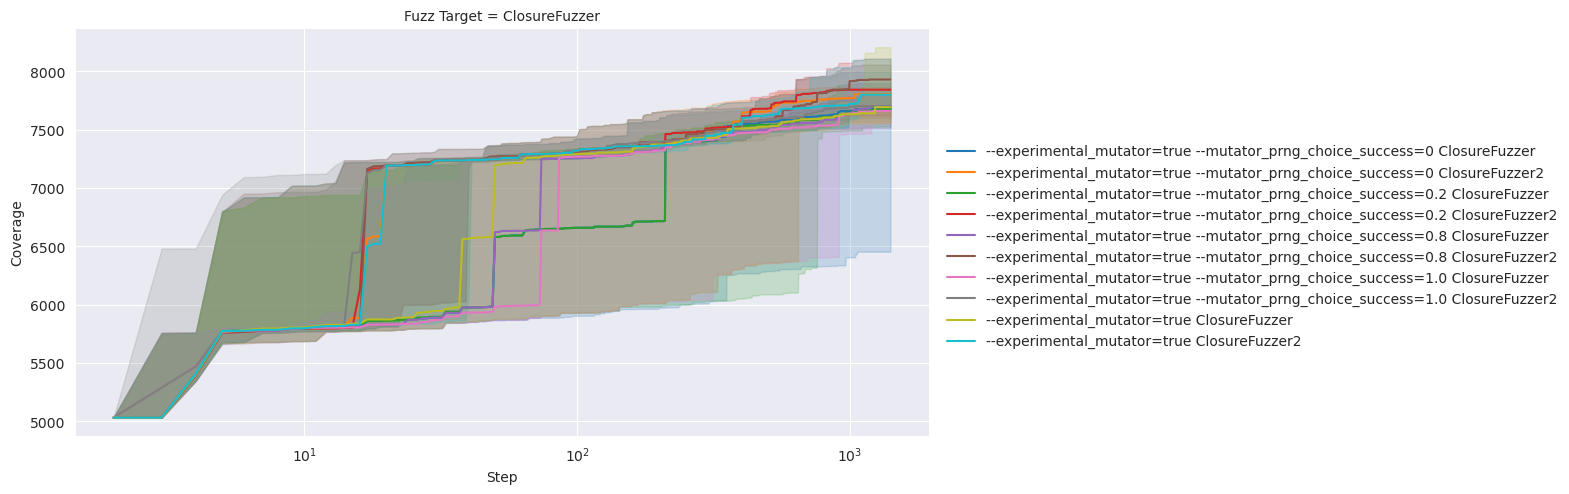

In [4]:
g = sns.FacetGrid(data=df2, row="Fuzz Target", height=5, aspect=2,sharey=False)
g.map(sns.lineplot, "Step", "Coverage","Param", errorbar=("pi", 75), estimator=np.median)
g.set(xscale='log')
g.add_legend()

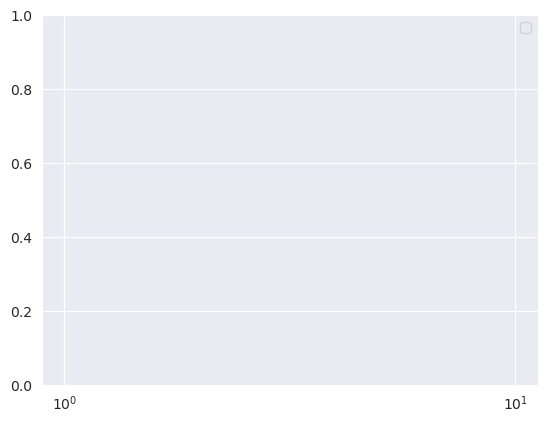

In [8]:
# g = sns.FacetGrid(data=df2, row="Fuzz Target", height=5, aspect=2,sharey=False)
# df2 = df2.loc[df2["Fuzz Target"]=="('ClosureGenFuzzer',)"]
ax = sns.lineplot(df2, x="Step", y="Coverage",hue="Param", style='Seed')
ax.set_xscale('log')
ax.legend("False")
# g.set(xscale='log')
# g.add_legend()